# mod2: Canonicity of Segments Model

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'dashlink/'

In [0]:
from fastai.vision import *

In [1]:
!python --version

Python 3.6.8


In [0]:
trnpath = Path(base_dir + 'Train'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Train')

In [0]:
# set output folder
outpath = Path('png2'); outpath

PosixPath('png2')

In [0]:
# tailpath.ls()
# ! ls -alh "{trnpath}"/{outpath} #takes long

In [0]:
#! find {path}/typ/
#! find {path}typ/  -printf "%f\n" > tags.csv

## Multi-Label Classification

In [0]:
df = pd.read_csv(trnpath/outpath/'canonical-segments.csv')
df.head()

,image_name,tags
0,687200104111158-1min,cl cr
1,687200104111441-1min,cl cr
2,687200104111637-1min,cl
3,687200104120347-1min,cr
4,687200104120604-1min,cr


In [0]:
df.shape

(993, 2)

In [0]:
! pwd

/content


In [0]:
trnpath.ls()

[PosixPath('/content/gdrive/My Drive/dashlink/Train/1min'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png33'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png33a'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png3'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png3a'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png2'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png1'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png3b'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png3c'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png3d'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png3e'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png3f'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png4'),
 PosixPath('/content/gdrive/My Drive/dashlink/Train/png4a')]

In [0]:
! cat "{trnpath}"/{outpath}/canonical-segments.csv

image_name,tags
687200104111158-1min,cl cr
687200104111441-1min,cl cr
687200104111637-1min,cl
687200104120347-1min,cr
687200104120604-1min,cr
687200104120922-1min,cl
687200104121106-1min,cr
687200104121330-1min,cl cr
687200104130631-1min,cl cr
687200104130953-1min,cr
687200104131343-1min,cl cr
687200104131515-1min,cl cr
687200104140606-1min,cl cr de
687200104140748-1min,cl cr
687200104140925-1min,cl cr
687200104141245-1min,cl cr
687200104141536-1min,cl cr
687200104141732-1min,cl cr
687200104141822-1min,cl cr
687200104150655-1min,cl cr
687200104151149-1min,cl cr
687200104151402-1min,cl
687200104151616-1min,cl cr
687200104151818-1min,cl cr
687200104152037-1min,cl cr de
687200104160508-1min,cl cr
687200104160719-1min,cl cr
687200104160916-1min,cl cr
687200104161114-1min,cl
687200104161332-1min,cl cr
687200104161603-1min,cl
687200104161811-1min,cl cr de
687200104170503-1min,cl cr
687200104170717-1min,cl cr
687200104170913-1min,cl cr
687200104171143-1min,cl cr
687200104171357-1min,cr
687200

In [0]:
# form item list
il = ImageList.from_csv(trnpath/outpath, 'canonical-segments.csv', folder='.', suffix='.png')

In [0]:
il.items[0]

'/content/gdrive/My Drive/dashlink/Train/png2/./687200104111158-1min.png'

In [0]:
# inspect item list
il

ImageList (993 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png2

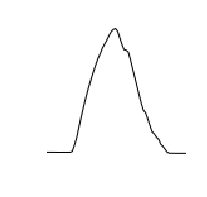

In [0]:
il[21].show()

In [0]:
# form train and valid item lists
#set seed to always get the same validation set:
ils = il.split_by_rand_pct(valid_pct=0.2, seed=787); type(ils); ils

ItemLists;

Train: ImageList (795 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png2;

Valid: ImageList (198 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png2;

Test: None

In [0]:
# form label lists
lls = ils.label_from_df(label_delim=' '); lls

LabelLists;

Train: LabelList (795 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: MultiCategoryList
cl;cr,cl,cr,cr,cr
Path: /content/gdrive/My Drive/dashlink/Train/png2;

Valid: LabelList (198 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: MultiCategoryList
cl,cl;cr,cl;cr,cl,cl;cr;de
Path: /content/gdrive/My Drive/dashlink/Train/png2;

Test: None

In [0]:
x,y = lls.train[7]; x,y

(Image (3, 130, 133), MultiCategory cr)

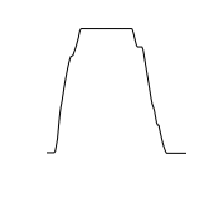

In [0]:
x.show()

In [0]:
tfms = get_transforms(do_flip=False, flip_vert=False, 
                      max_rotate=0., max_zoom=1., 
                      max_lighting=0., max_warp=0.)

In [0]:
lls = lls.transform(tfms, size=128)

In [0]:
bs = 8
# bs = 16
# bs = 32
# bs = 64

In [0]:
data = lls.databunch(bs=bs).normalize(imagenet_stats)

In [0]:
x,y = data.train_ds[4]

MultiCategory cr

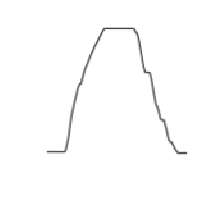

In [0]:
x.show(); y

In [0]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([8, 3, 128, 128]), torch.Size([8, 4]))

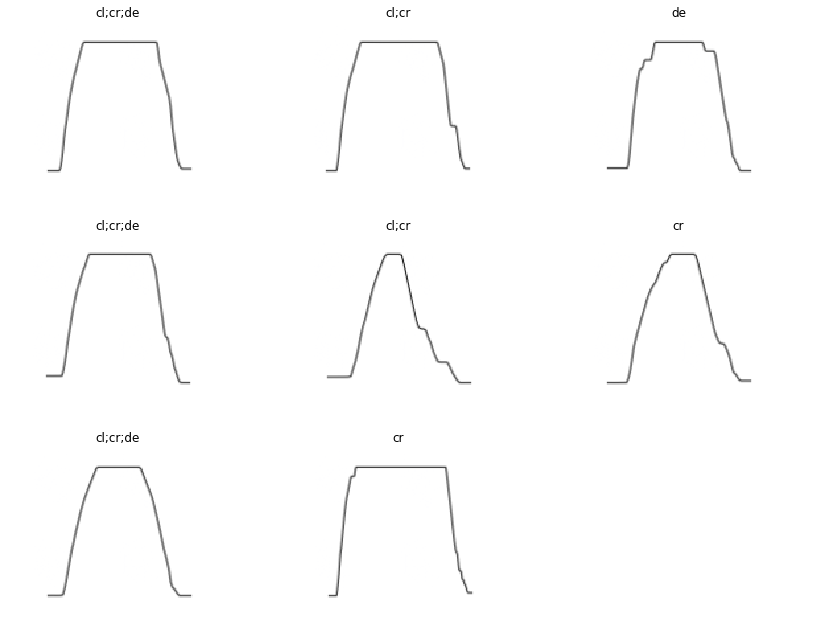

In [0]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
data.classes

['cl', 'cr', 'de', 'no']

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cl', 'cr', 'de', 'no'], 4, 795, 198)

## Train model

In [0]:
# arch = models.resnet18
# arch = models.resnet34
arch = models.resnet50

In [0]:
#ke: tune thresh
# my_thresh = 0.01 #.70
# my_thresh = 0.1 #.83
# my_thresh = 0.2 #.90
# my_thresh = 0.3 #.91
# my_thresh = 0.4 #.91
my_thresh = 0.5 #.94
# my_thresh = 0.6 #.93
# my_thresh = 0.7 #.93
# my_thresh = 0.8 #.91
# my_thresh = 0.9 #.88

In [0]:
# def acc_02(inp, targ): return accuracy_thresh(inp, targ, thresh=0.2) #same, but can use partial
acc_thresh = partial(accuracy_thresh, thresh=my_thresh) #i.e. call accuracy_thresh with thresh=0.2 always

In [0]:
fbeta??

In [0]:
f_score = partial(fbeta, thresh=my_thresh, beta=1) #call fbeta always with my_thresh and beta=1

In [0]:
learn = cnn_learner(data, arch, metrics=[f_score, acc_thresh])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


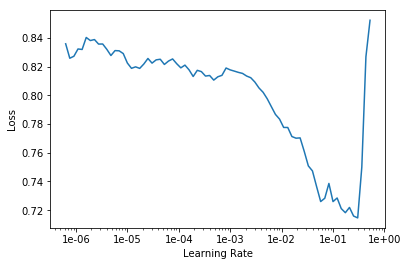

In [0]:
learn.lr_find()
# learn.lr_find(start_lr=1e-09, end_lr=1e-0)
learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(4, slice(lrf))

# learn.fit_one_cycle(16, slice(3e-4)) #
# learn.fit_one_cycle(16, slice(4e-4)) #

# learn.fit_one_cycle(16, slice(1e-5)) #
# learn.fit_one_cycle(32, slice(2e-5)) #
# learn.fit_one_cycle(16, slice(5e-5)) #

# learn.fit_one_cycle(16, slice(1e-4)) #
# learn.fit_one_cycle(16, slice(2e-4)) #
# learn.fit_one_cycle(16, slice(3e-4)) #
# learn.fit_one_cycle(16, slice(5e-4)) #

# learn.fit_one_cycle(16, slice(1e-3)) #
# learn.fit_one_cycle(1, slice(2e-3)) #
# learn.fit_one_cycle(32, slice(3e-3)) #
# learn.fit_one_cycle(32, slice(4e-3)) #
# learn.fit_one_cycle(16, slice(5e-3)) #
# learn.fit_one_cycle(32, slice(6e-3)) #
# learn.fit_one_cycle(32, slice(7e-3)) #
# learn.fit_one_cycle(16, slice(8e-3)) #
# learn.fit_one_cycle(16, slice(9e-3)) #

# learn.fit_one_cycle(16, slice(1e-2)) #
# learn.fit_one_cycle(40, slice(2e-2)) #90,90
learn.fit_one_cycle(40, slice(3e-2)) #91,91
# learn.fit_one_cycle(32, slice(4e-2)) #91
# learn.fit_one_cycle(16, slice(5e-2)) #
# learn.fit_one_cycle(16, slice(6e-2)) #

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.532684,0.394934,0.771380,0.843434,00:09
1,0.406491,0.361292,0.798485,0.845960,00:09
2,0.358110,0.365910,0.784007,0.847222,00:09
3,0.339137,0.328103,0.822222,0.857323,00:09
4,0.308034,0.358575,0.792593,0.852273,00:09
5,0.326587,0.317729,0.828451,0.873737,00:09
6,0.320490,0.316566,0.827778,0.876263,00:09
7,0.343666,0.417592,0.815993,0.852273,00:09
8,0.366653,0.405166,0.729125,0.830808,00:09
9,0.348751,2.083180,0.784175,0.847222,00:09


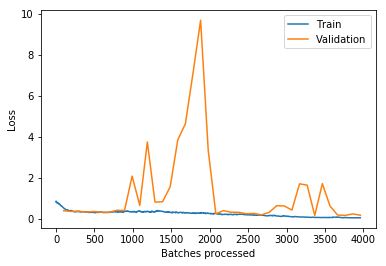

In [0]:
learn.recorder.plot_losses()

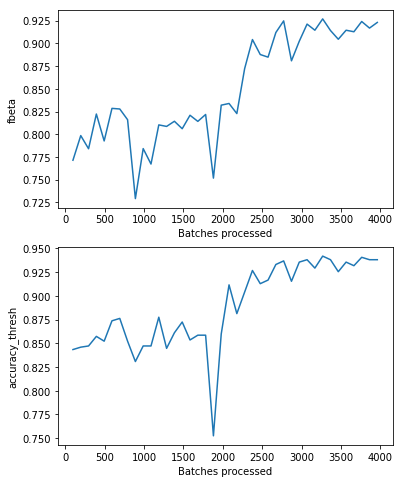

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-1') #.923

In [0]:
#go back to learn.fit_one_cycle(...)

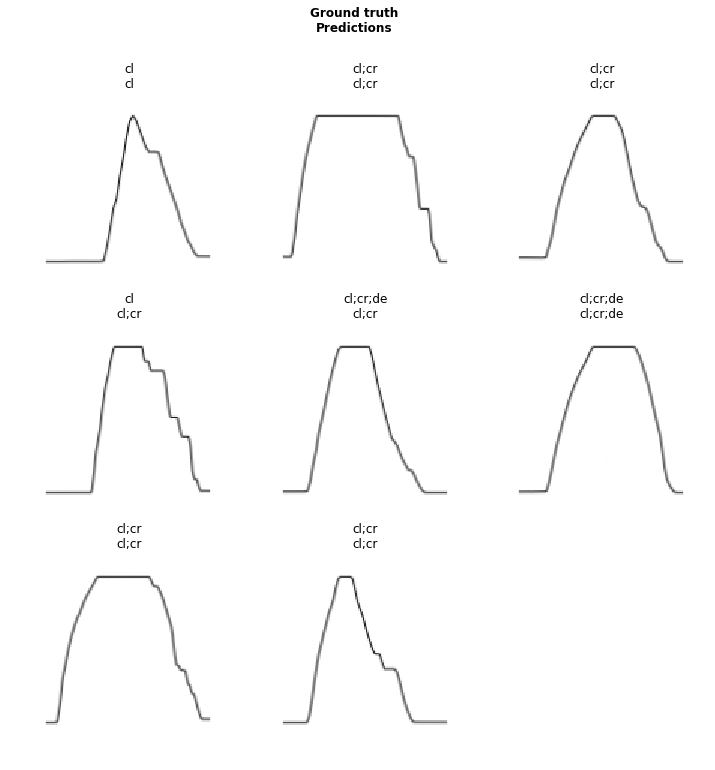

In [0]:
# learn.show_results(rows=3)
learn.show_results(rows=3, thresh=my_thresh)
# learn.show_results(rows=3, thresh=.4)

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (795 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
cl;cr,cl,cr,cr,cr
Path: /content/gdrive/My Drive/dashlink/Train/png2;

Valid: LabelList (198 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
cl,cl;cr,cl;cr,cl,cl;cr;de
Path: /content/gdrive/My Drive/dashlink/Train/png2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


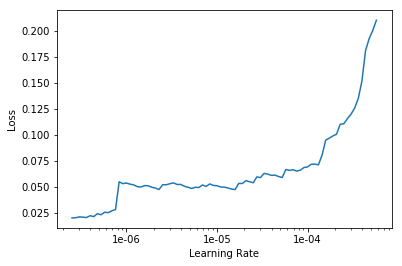

In [0]:
# learn.lr_find()
# learn.lr_find(stop_div=False)
learn.lr_find(start_lr=1e-7, end_lr=1e-3, stop_div=False)
learn.recorder.plot()

In [0]:
lrf = 3e-2 #at steepest part of curve (that was used above)
# lru = 1e-8 #at least an order below the minimum
# learn.fit_one_cycle(4, slice(lru, lrf/5))
# learn.fit_one_cycle(16, slice(1e-10, lrf/10)) #
# learn.fit_one_cycle(1, slice(1e-9, lrf/10)) #
# learn.fit_one_cycle(48, slice(1e-8, lrf/10)) #928
# learn.fit_one_cycle(32, slice(1e-7, lrf/10)) #931
learn.fit_one_cycle(27, slice(1e-6, lrf/10)) #938
# learn.fit_one_cycle(16, slice(1e-5, lrf/10)) #

# learn.fit_one_cycle(16, slice(1e-9, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-8, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-7, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-6, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-5, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-4, lrf/5)) #

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.055221,0.329724,0.913131,0.935606,00:13
1,0.052519,0.953726,0.908249,0.929293,00:13
2,0.079978,2.095243,0.908754,0.934343,00:13
3,0.079445,0.167378,0.920202,0.943182,00:13
4,0.124708,0.174209,0.913805,0.933081,00:13
5,0.096133,0.164811,0.913805,0.936869,00:13
6,0.081498,0.178341,0.922054,0.939394,00:13
7,0.079306,0.178707,0.922559,0.941919,00:13
8,0.122314,0.207616,0.895455,0.931818,00:13
9,0.102616,0.174882,0.910606,0.934343,00:13


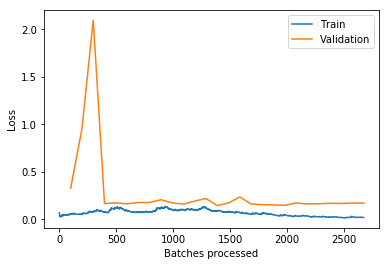

In [0]:
learn.recorder.plot_losses()

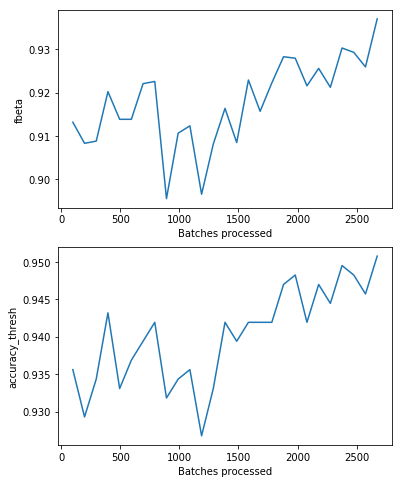

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-2') #.930,.937

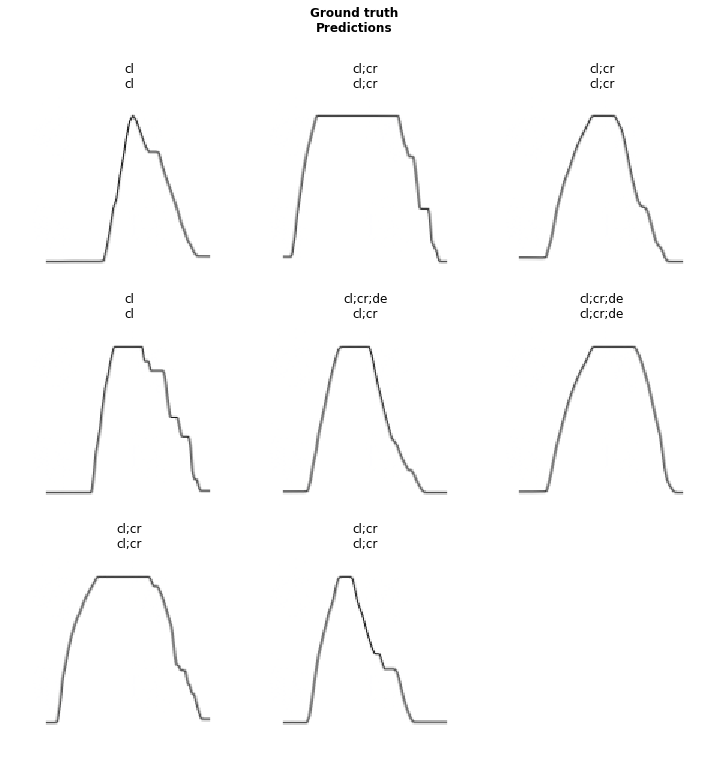

In [0]:
# learn.show_results()
learn.show_results(rows=3, thresh=my_thresh)

## Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (795 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
cl;cr,cl,cr,cr,cr
Path: /content/gdrive/My Drive/dashlink/Train/png2;

Valid: LabelList (198 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
cl,cl;cr,cl;cr,cl,cl;cr;de
Path: /content/gdrive/My Drive/dashlink/Train/png2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

4 misclassified samples over 198 samples in the validation set.


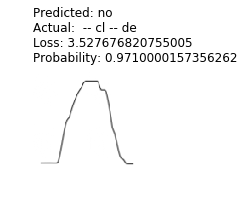

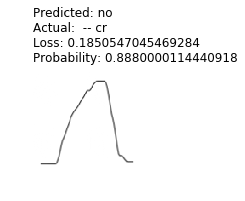

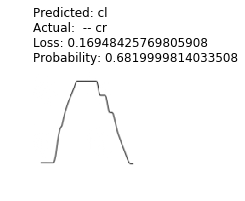

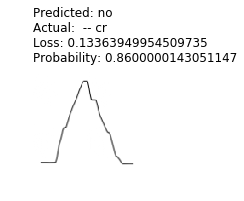

In [0]:
# interp.plot_confusion_matrix() #ke: don't make sense here
interp.plot_multi_top_losses(samples=8, figsize=[2,2])

## Test Inference/Production (on train data

In [0]:
learn.export()

In [0]:
!ls -altrh "{trnpath}"/{outpath}/export.pkl

-rw------- 1 root root 99M Sep 30 15:37 '/content/gdrive/My Drive/dashlink/Train/png2/export.pkl'


In [0]:
!ls "{trnpath}"/{outpath}

687200104111158-1min.png  687200108180802-1min.png  687200110161102-1min.png
687200104111441-1min.png  687200108181225-1min.png  687200110161409-1min.png
687200104111637-1min.png  687200108181341-1min.png  687200110161652-1min.png
687200104120347-1min.png  687200108181535-1min.png  687200110162002-1min.png
687200104120604-1min.png  687200108181840-1min.png  687200110170552-1min.png
687200104120922-1min.png  687200108182058-1min.png  687200110170728-1min.png
687200104121106-1min.png  687200108182218-1min.png  687200110171038-1min.png
687200104121330-1min.png  687200108191103-1min.png  687200110171405-1min.png
687200104130631-1min.png  687200108191220-1min.png  687200110171559-1min.png
687200104130953-1min.png  687200108191405-1min.png  687200110171817-1min.png
687200104131343-1min.png  687200108191740-1min.png  687200110180559-1min.png
687200104131515-1min.png  687200108192043-1min.png  687200110180934-1min.png
687200104140606-1min.png  687200108201232-1min.png  687200110181307-1min.png

In [0]:
learn = load_learner(trnpath/outpath)

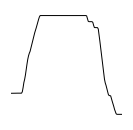

In [0]:
img = open_image(trnpath/outpath/'687200112310928-1min.png'); img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

MultiCategory cl